Using TensorFlow backend.
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


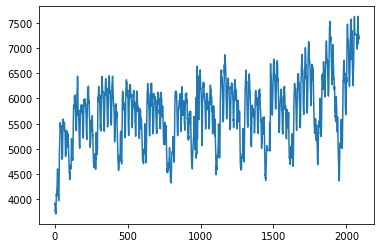

Fit ARIMA: order=(1, 0, 1); AIC=26397.153, BIC=26419.729, Fit time=0.678 seconds
Fit ARIMA: order=(0, 0, 0); AIC=33042.488, BIC=33053.776, Fit time=0.003 seconds
Fit ARIMA: order=(1, 0, 0); AIC=26643.021, BIC=26659.953, Fit time=0.132 seconds
Fit ARIMA: order=(0, 0, 1); AIC=30544.454, BIC=30561.386, Fit time=0.434 seconds
Fit ARIMA: order=(2, 0, 1); AIC=26326.111, BIC=26354.331, Fit time=0.599 seconds
Fit ARIMA: order=(2, 0, 0); AIC=26353.673, BIC=26376.249, Fit time=0.367 seconds
Fit ARIMA: order=(2, 0, 2); AIC=26327.322, BIC=26361.186, Fit time=0.976 seconds
Fit ARIMA: order=(3, 0, 2); AIC=26275.572, BIC=26315.080, Fit time=1.145 seconds
Fit ARIMA: order=(3, 0, 1); AIC=26327.781, BIC=26361.645, Fit time=1.324 seconds
Fit ARIMA: order=(3, 0, 3); AIC=26266.611, BIC=26311.762, Fit time=1.130 seconds
Fit ARIMA: order=(2, 0, 3); AIC=26267.543, BIC=26307.050, Fit time=1.140 seconds
Total fit time: 8.243 seconds
                              ARMA Model Results                              


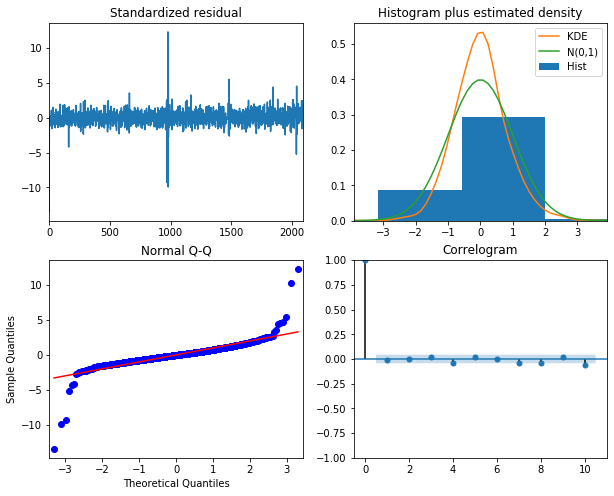

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras import regularizers
from keras.constraints import maxnorm
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA, ARIMA
import pmdarima as pm


# The models were done by hour using all the days of the week
data = pd.read_excel("C:/Users/ERIC/Desktop/PML-06MTP-115/06MTP 01012020.xlsm",squeeze=True, sheet_name = 0)

demand = data.iloc[:,2].values
# Plot all the data
plt.figure()
plt.plot(demand)
plt.show()

model = pm.auto_arima(demand, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

model.plot_diagnostics(figsize=(10,8))
plt.show()


predicted=7648.043856, expected=7583.570000
predicted=7503.110472, expected=7403.400000
predicted=7294.199716, expected=7263.830000
predicted=7127.365758, expected=7286.250000
predicted=7181.418294, expected=7270.250000
predicted=7173.104814, expected=7271.000000
predicted=7226.774700, expected=7271.000000
predicted=7232.932870, expected=7271.000000
predicted=7228.967282, expected=7271.000000
predicted=7213.350972, expected=7271.000000
predicted=7204.929271, expected=7271.000000
predicted=7204.755064, expected=7271.000000
predicted=7210.218845, expected=7271.000000
predicted=7215.115190, expected=7271.000000
predicted=7216.795832, expected=7271.000000
predicted=7215.638566, expected=7271.000000
predicted=7213.768937, expected=7271.000000
predicted=7212.791519, expected=7141.670000
predicted=7045.786935, expected=6984.250000
predicted=6880.564759, expected=7098.170000
predicted=7055.080220, expected=7151.670000
predicted=7091.185075, expected=7423.170000
predicted=7478.392721, expected=

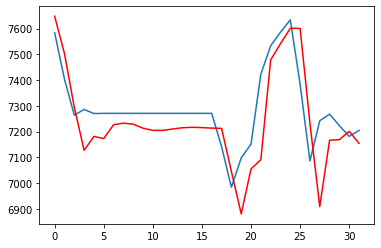

,Pred
0,7648.043856
1,7503.110472
2,7294.199716
3,7127.365758
4,7181.418294
5,7173.104814
6,7226.774700
7,7232.932870
8,7228.967282
9,7213.350972


In [3]:
size = int(len(demand) * 0.985) 
train, test = demand[0:size], demand[size:len(demand)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARMA(history, order=(3,3))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
print(len(predictions))

for i in range(len(predictions)):
    pred = pd.DataFrame(predictions)
pred.columns = ['Pred']
# predictions = pd.DataFrame(predictions)
# predictions.columns = ['Predictions']
# history = pd.DataFrame(history)
# history.columns = ['Expected']
# values = pd.concat(predictions, history)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
pred

In [4]:
model = ARMA(demand, order=(5,3))
model_fit2 = model.fit(disp=0)
forecast_demand = model_fit2.forecast(steps = 48)
forecast_demand = pd.DataFrame(forecast_demand[0])
forecast_demand.columns = ['Demand Predicted']
forecast_demand

,Demand Predicted
0,7187.553650
1,7156.372223
2,7134.508405
3,7105.183586
4,7075.054576
5,7046.177959
6,7017.627267
7,6990.780898
8,6965.929720
9,6943.052953


Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=26126.081, BIC=26154.272, Fit time=12.712 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=32673.336, BIC=32684.613, Fit time=0.289 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=26556.734, BIC=26579.287, Fit time=11.966 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=29875.403, BIC=29897.956, Fit time=5.380 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=26028.000, BIC=26061.829, Fit time=25.134 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 0, 12); AIC=26515.802, BIC=26543.993, Fit time=17.302 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=25767.035, BIC=25806.502, Fit time=41.043 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=28985.996, BIC=29019.825, Fit time=78.213 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=25755.884, BIC=25800.990, Fit time=63.572 seconds
Fit

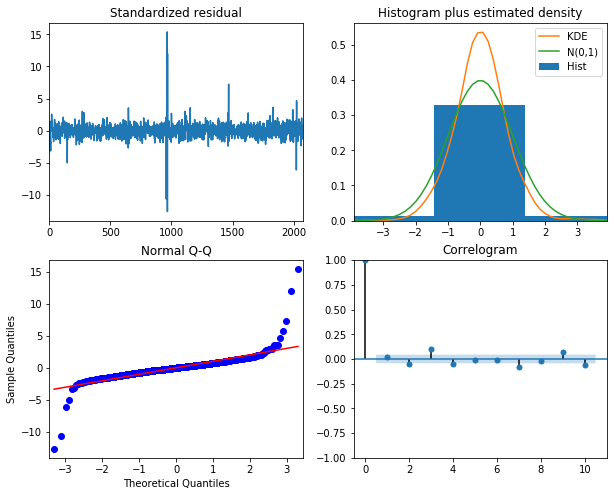

In [5]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(demand, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()
smodel.plot_diagnostics(figsize=(10,8))
plt.show()

In [6]:
smodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 2088
Model:             SARIMAX(2, 0, 0)x(1, 1, [1, 2], 12)   Log Likelihood              -12859.971
Date:                                 Thu, 02 Apr 2020   AIC                          25733.943
Time:                                         08:00:57   BIC                          25773.410
Sample:                                              0   HQIC                         25748.407
                                                - 2088                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0878      0.212     -0.414      0.679      -0.503       0.328
ar.L1          1.0891      0.006    167.769      0.000       1.076       1.102
ar.L2         -0.0899      0.006    -13.875      0.000      -0.103      -0.077
ar.S.L12      -0.9985      0.001   -912.802      0.000      -1.001      -0.996
ma.S.L12       0.0072      0.012      0.628      0.530      -0.015       0.030
ma.S.L24      -0.9409      0.010    -94.679      0.000      -0.960      -0.921
sigma2      1.343e+04     96.308    139.476      0.000    1.32e+04    1.36e+04
===================================================================================
Ljung-Box (Q):                      114.63   Jarque-Bera (JB):            259580.37
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.38   Skew:                             1.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        57.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7625.471896, expected=7583.570000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7443.583482, expected=7403.400000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7119.876640, expected=7263.830000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7320.858424, expected=7286.250000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7309.926248, expected=7270.250000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7175.053118, expected=7271.000000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7152.069198, expected=7271.000000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7196.500093, expected=7271.000000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7080.843463, expected=7271.000000
predicted=7098.317091, expected=7271.000000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7163.808709, expected=7271.000000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7190.644077, expected=7271.000000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7201.657175, expected=7271.000000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7167.986606, expected=7271.000000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7312.819536, expected=7271.000000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7332.275002, expected=7271.000000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7417.339746, expected=7271.000000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7405.462135, expected=7141.670000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7197.107852, expected=6984.250000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7045.361030, expected=7098.170000
predicted=7163.243319, expected=7151.670000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7182.102402, expected=7423.170000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7436.702944, expected=7533.250000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7519.614704, expected=7586.080000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7603.778215, expected=7634.000000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7512.698518, expected=7384.000000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7228.923032, expected=7085.920000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7137.515071, expected=7242.330000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7269.379958, expected=7267.920000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7162.351890, expected=7223.330000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7109.005156, expected=7181.750000


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=7095.034446, expected=7204.670000
32
Test MSE: 13801.422


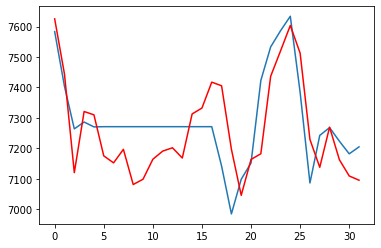

,Pred
0,7625.471896
1,7443.583482
2,7119.876640
3,7320.858424
4,7309.926248
5,7175.053118
6,7152.069198
7,7196.500093
8,7080.843463
9,7098.317091


In [7]:
import statsmodels.api as sm
size = int(len(demand) * 0.985) 
train, test = demand[0:size], demand[size:len(demand)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = sm.tsa.statespace.SARIMAX(history,order=(2,0,0),seasonal_order=(1,1,[1,2],12), enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
print(len(predictions))

for i in range(len(predictions)):
    pred = pd.DataFrame(predictions)
pred.columns = ['Pred']
# predictions = pd.DataFrame(predictions)
# predictions.columns = ['Predictions']
# history = pd.DataFrame(history)
# history.columns = ['Expected']
# values = pd.concat(predictions, history)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
pred

In [8]:
model = sm.tsa.statespace.SARIMAX(history,order=(2,0,0),seasonal_order=(1,1,[1,2],12), enforce_stationarity=False, enforce_invertibility=False)
model_fit2 = model.fit(disp=0)
forecast_demand = model_fit2.forecast(steps = 48)
forecast_demand = pd.DataFrame(forecast_demand)
forecast_demand.columns = ['Demand Predicted']
forecast_demand

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


,Demand Predicted
0,7031.019605
1,6865.720442
2,6717.148539
3,6641.101528
4,6587.804323
5,6578.759007
6,6630.589703
7,6706.162828
8,6860.027964
9,7000.568144
